## Dataset

In [53]:
import re
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [54]:
df_true = pd.read_csv("fake-and-real-news-dataset\True.csv")
df_fake = pd.read_csv("fake-and-real-news-dataset\Fake.csv")

# df_true = pd.DataFrame(data_true)
# df_fake = pd.DataFrame(data_fake)

df_true['is_true'] = 1
df_fake['is_true'] = 0
    
frames = [df_true, df_fake]

df = pd.concat(frames).reset_index(drop=True)

X, y = df["text"], df['is_true']
df

,title,text,subject,date,is_true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


## Preprocessing

In [55]:
# removal of special characters, lower
X_prep = []

for news in tqdm(X):
    x = re.sub('[^a-zA-z0-9]+', ' ', news).lower()
    X_prep.append(x)


100%|█████████████████████████████████████████| 44898/44898 [00:07<00:00, 5685.84it/s]


In [56]:
X_prep[150]


'washington reuters the white house said on thursday it would continue to work with republican senator marco rubio as he seeks a further expansion of a child tax credit in a tax overhaul bill but that it was proud lawmakers were already considering doubling it we re really proud of the work that we ve done already up until this point with senator rubio already doubling the child tax credit white house spokeswoman sarah sanders told reporters we re going to continue working with the senator but we think we ve made great strides '

## Vectorization

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

cv = CountVectorizer()

X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.1, random_state=42)

X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

X_train, X_test

(<40408x116922 sparse matrix of type '<class 'numpy.int64'>'
 	with 8462846 stored elements in Compressed Sparse Row format>,
 <4490x116922 sparse matrix of type '<class 'numpy.int64'>'
 	with 929584 stored elements in Compressed Sparse Row format>)

## Training

In [59]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

<Axes: >

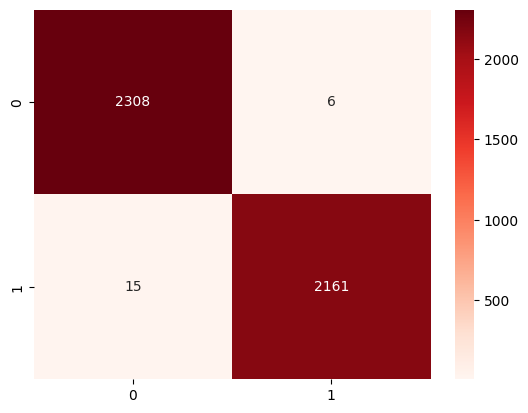

In [60]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2314
           1       1.00      0.99      1.00      2176

    accuracy                           1.00      4490
   macro avg       1.00      1.00      1.00      4490
weighted avg       1.00      1.00      1.00      4490

